<a href="https://colab.research.google.com/github/aigOffline/Airline_Reservation_System/blob/main/CXD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objectives

As an analyst for the lab, your team has tasked you with understanding and explaining the performance of the experiment. Prior to implementing the experiment, your lab team had developed a list of questions it hoped to answer.

. How do clients interact with the process differently?

. Who currently engages Vanguard via this process?

. For the experimental new process, how can its success be measured?

. How did the new process perform?

**1. PACKAGES**

In [1]:
# Base
# -----------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Hypothesis Testing
# -----------------------------------
import scipy.stats as stats

# Configuration
# -----------------------------------
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

2. DATA

In [6]:
#Data set 1 (df_final_demo) contains client demographic information
df_final = pd.read_csv('/content/df_final_demo.txt')
#Data set 2 (df_final_web_data) contains web hit level web activity
df_final_web_data_pt_1 = pd.read_csv('/content/df_final_web_data_pt_1.txt')
df_final_web_data_pt_2 = pd.read_csv('/content/df_final_web_data_pt_2.txt')
#Data set 3 (df_final_experiment_clients) contains a list of clients and indicates whether they were a part of the experiment
df_final_experiment_clients = pd.read_csv('/content/df_final_experiment_clients.txt')

In [7]:
df_final_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [8]:
df_final_web_data_pt_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [9]:
df_final_web_data_pt_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [14]:
# dfs = [df_final, df_final_web_data_pt_1, df_final_web_data_pt_2, df_final_experiment_clients]
# df_names = ['df_final', 'df_final_web_data_pt_1', 'df_final_web_data_pt_2', 'df_final_experiment_clients']

# # Loop through the dataframes
# for i, df in enumerate(dfs):
#     print(f'--- {df_names[i]} ---')

#     # Print the dimensions of the dataframe
#     print(f'Dimensions: {df.shape}\n')

#     # Print the number of missing values in each column
#     print(f'Missing values:\n{df.isnull().sum()}\n')

#     # Print a summary of the dataframe
#     print(f'Summary statistics:\n{df.describe(include="all")}\n\n')

In [13]:
# List of dataframes and their names
dfs = [df_final, df_final_web_data_pt_1, df_final_web_data_pt_2, df_final_experiment_clients]
df_names = ['df_final', 'df_final_web_data_pt_1', 'df_final_web_data_pt_2', 'df_final_experiment_clients']

# Function to print summary stats for a dataframe
def print_summary_stats(df, df_name):
    print(f'--- {df_name} ---')
    print(f'Dimensions: {df.shape}\n')
    print(f'Missing values:\n{df.isnull().sum()}\n')
    print(f'Summary statistics:\n{df.describe(include="all")}\n\n')

# Check df_final
print_summary_stats(df_final, 'df_final')

# Check df_final_web_data_pt_1
print_summary_stats(df_final_web_data_pt_1, 'df_final_web_data_pt_1')

# Check df_final_web_data_pt_2
print_summary_stats(df_final_web_data_pt_2, 'df_final_web_data_pt_2')

# Check df_final_experiment_clients
print_summary_stats(df_final_experiment_clients, 'df_final_experiment_clients')

--- df_final ---
Dimensions: (70609, 9)

Missing values:
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

Summary statistics:
          client_id  clnt_tenure_yr  clnt_tenure_mnth   clnt_age  gendr  \
count    70609.0000      70595.0000        70595.0000 70594.0000  70595   
unique          NaN             NaN               NaN        NaN      4   
top             NaN             NaN               NaN        NaN      U   
freq            NaN             NaN               NaN        NaN  24122   
mean   5004991.8766         12.0529          150.6594    46.4422    NaN   
std    2877277.6298          6.8718           82.0899    15.5913    NaN   
min        169.0000          2.0000           33.0000    13.5000    NaN   
25%    2519329.0000          6.0000           82.0000    32.5000    NaN   
50%    5016978.0000        

**How do clients interact with the process differently?**

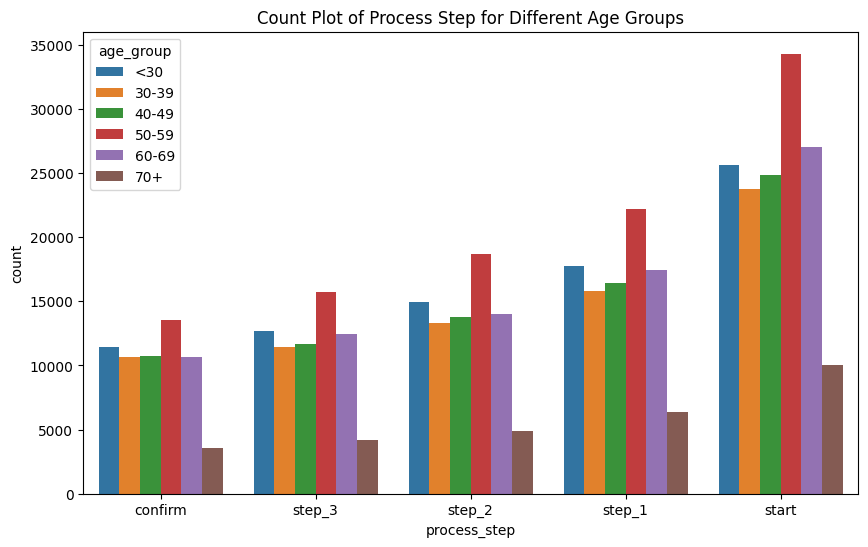

In [66]:
# Create age groups
df['age_group'] = pd.cut(df['clnt_age'], bins=[0, 30, 40, 50, 60, 70, 100], labels=['<30', '30-39', '40-49', '50-59', '60-69', '70+'])

# Count plot of 'process_step' for different age groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='process_step', hue='age_group')
plt.title('Count Plot of Process Step for Different Age Groups')
plt.show()

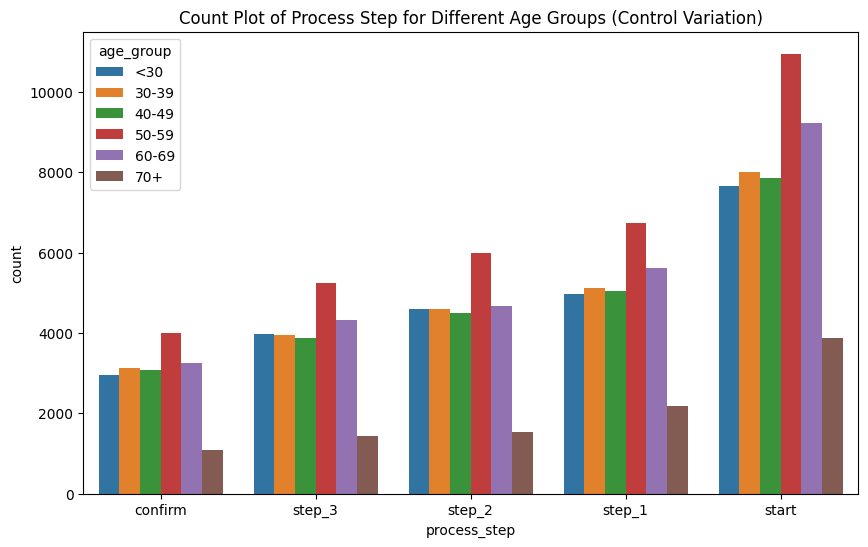

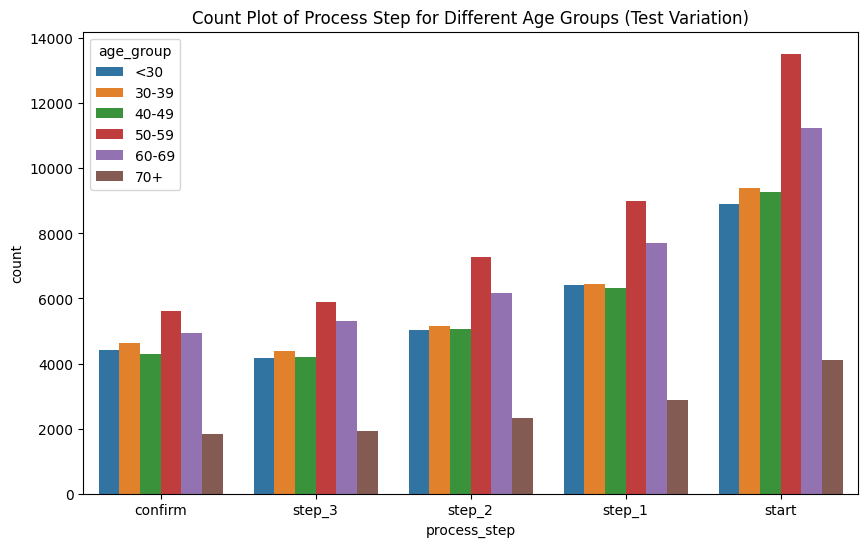

In [67]:
# Filter data for 'Control' variation
df_control = df[df['Variation'] == 'Control']

# Count plot of 'process_step' for different age groups in 'Control' variation
plt.figure(figsize=(10, 6))
sns.countplot(data=df_control, x='process_step', hue='age_group')
plt.title('Count Plot of Process Step for Different Age Groups (Control Variation)')
plt.show()

# Filter data for 'Test' variation
df_test = df[df['Variation'] == 'Test']

# Count plot of 'process_step' for different age groups in 'Test' variation
plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='process_step', hue='age_group')
plt.title('Count Plot of Process Step for Different Age Groups (Test Variation)')
plt.show()

In [ ]:
# Histograms for continuous variables
for column in ['clnt_age', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'num_accts', 'bal']:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column} for Clients Engaging with the Process')
    plt.show()

# Bar plot for 'gendr'
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='gendr')
plt.title('Gender Distribution for Clients Engaging with the Process')
plt.show()

**Who currently engages Vanguard via this process?**

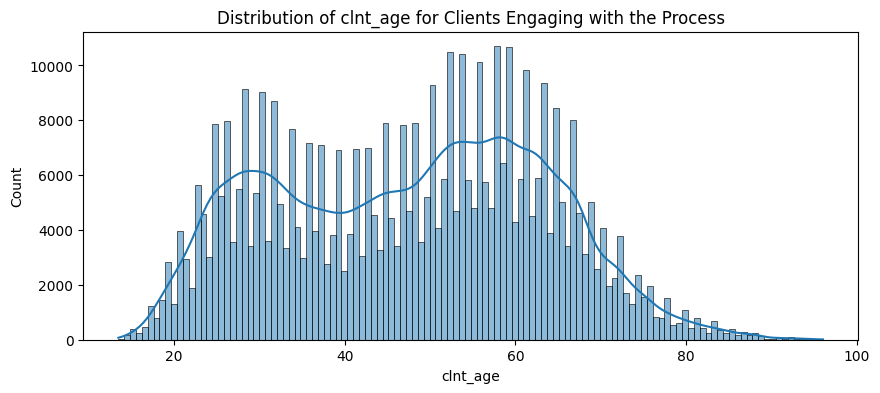

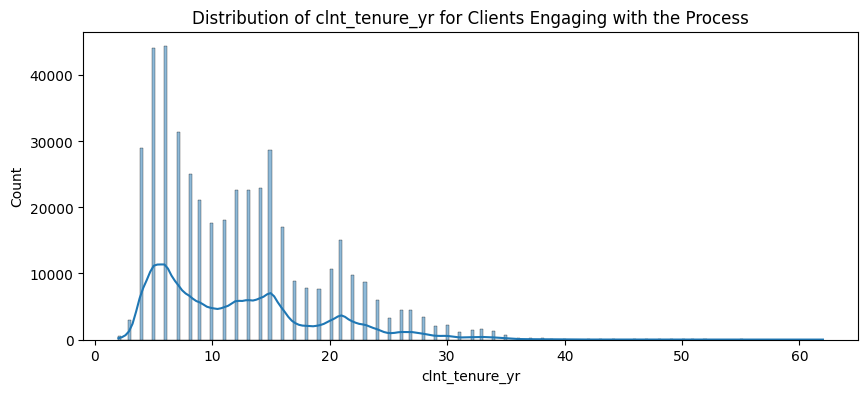

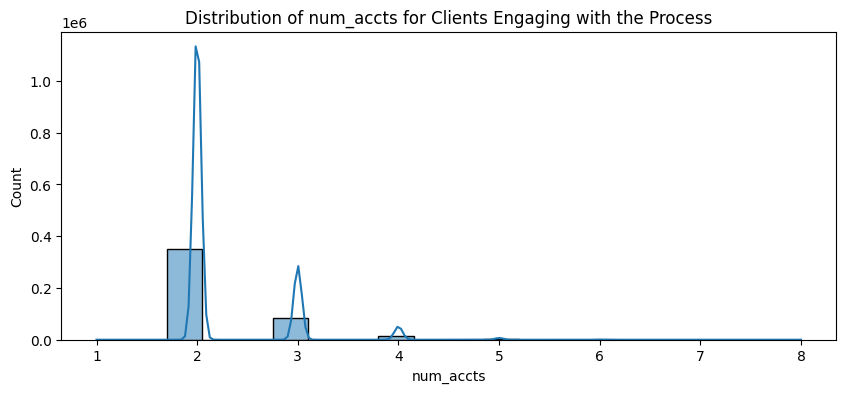

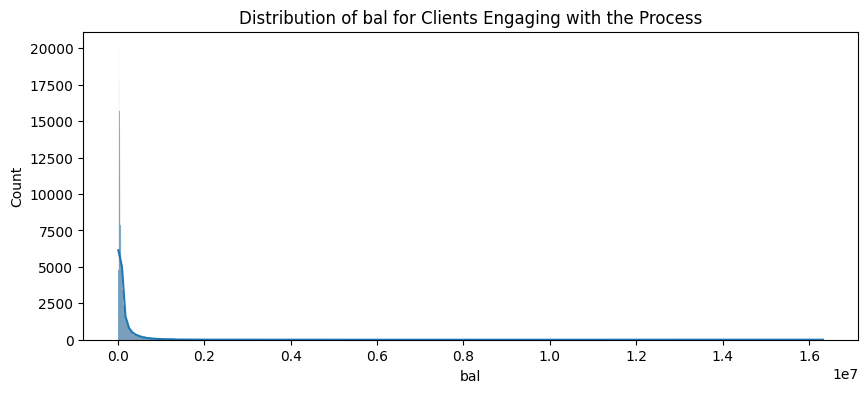

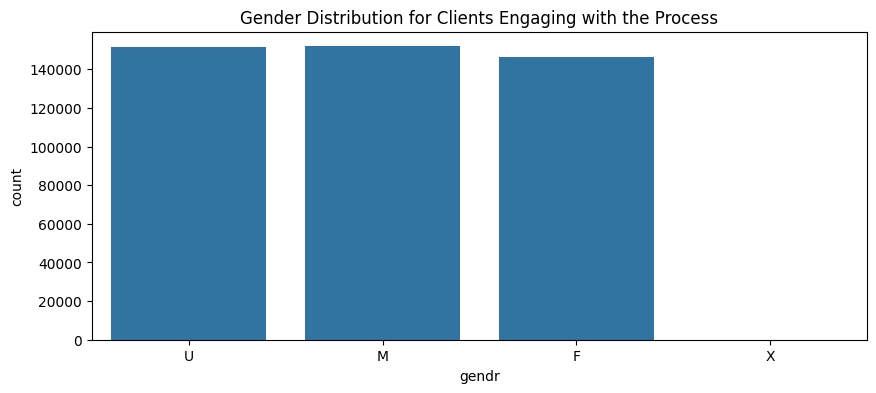

In [69]:
# Histograms for continuous variables
for column in ['clnt_age', 'clnt_tenure_yr', 'num_accts', 'bal']:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column} for Clients Engaging with the Process')
    plt.show()

# Bar plot for 'gendr'
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='gendr')
plt.title('Gender Distribution for Clients Engaging with the Process')
plt.show()

**For the experimental new process, how can its success be measured?**

To measure the success of the new process, you can track metrics that reflect client engagement. Here are a few examples:

Number of logins: If the new process is more engaging, you might expect to see an increase in the number of logins. You can calculate this by counting the number of unique 'visit_id's for each client before and after the introduction of the new process.

Number of clients using the process: If the new process is more engaging, you might expect to see more clients using it. You can calculate this by counting the number of unique 'client_id's associated with the process.

Time spent on the process: If the new process is more engaging, clients might spend more time on it. If you have data on the time each client spends on the process, you can calculate the average time spent before and after the introduction of the new process.

Completion rate: If the new process is more user-friendly, more clients might complete it. You can calculate the completion rate as the number of clients who reach the final step of the process divided by the total number of clients who start the process.

Here's some example code to calculate the number of logins and the number of clients using the process:

In [83]:
df['process_step'].unique()

array(['confirm', 'step_3', 'step_2', 'step_1', 'start'], dtype=object)

In [84]:
# Calculate the number of logins for 'Control' and 'Test' variations
num_logins_control = df[df['Variation'] == 'Control']['visit_id'].nunique()
num_logins_test = df[df['Variation'] == 'Test']['visit_id'].nunique()

# Calculate the number of clients using the process for 'Control' and 'Test' variations
num_clients_control = df[df['Variation'] == 'Control']['client_id'].nunique()
num_clients_test = df[df['Variation'] == 'Test']['client_id'].nunique()

# Calculate the average visit spent on the process for 'Control' and 'Test' variations
avg_time_control = df[df['Variation'] == 'Control']['logons_6_mnth'].mean()
avg_time_test = df[df['Variation'] == 'Test']['logons_6_mnth'].mean()

# Calculate the completion rate for 'Control' and 'Test' variations
num_completed_control = df[(df['Variation'] == 'Control') & (df['process_step'] == 'confirm')]['client_id'].nunique()
num_started_control = df[df['Variation'] == 'Control']['client_id'].nunique()
completion_rate_control = num_completed_control / num_started_control

num_completed_test = df[(df['Variation'] == 'Test') & (df['process_step'] == 'confirm')]['client_id'].nunique()
num_started_test = df[df['Variation'] == 'Test']['client_id'].nunique()
completion_rate_test = num_completed_test / num_started_test

# Print the results
print(f'Number of logins for Control: {num_logins_control}, Test: {num_logins_test}')
print(f'Number of clients for Control: {num_clients_control}, Test: {num_clients_test}')
print(f'Average time spent for Control: {avg_time_control}, Test: {avg_time_test}')
print(f'Completion rate for Control: {completion_rate_control}, Test: {completion_rate_test}')

Number of logins for Control: 32189, Test: 37136
Number of clients for Control: 23532, Test: 26968
Average time spent for Control: 6.311678984799888, Test: 6.245608509058592
Completion rate for Control: 0.6558728539860615, Test: 0.6929323642835954


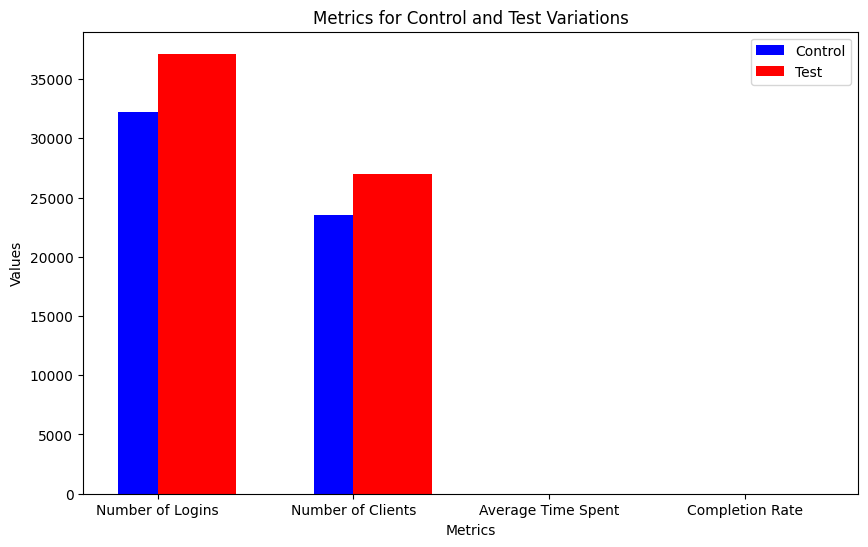

In [85]:
import matplotlib.pyplot as plt

# Metrics for 'Control' and 'Test' variations
metrics_control = [num_logins_control, num_clients_control, avg_time_control, completion_rate_control]
metrics_test = [num_logins_test, num_clients_test, avg_time_test, completion_rate_test]

# Metric names
metrics_names = ['Number of Logins', 'Number of Clients', 'Average Time Spent', 'Completion Rate']

# Create bar plots
x = range(len(metrics_names))
plt.figure(figsize=(10, 6))
plt.bar(x, metrics_control, width=0.4, label='Control', color='b', align='center')
plt.bar(x, metrics_test, width=0.4, label='Test', color='r', align='edge')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Metrics for Control and Test Variations')
plt.xticks(x, metrics_names)
plt.legend()
plt.show()

In [74]:
import matplotlib.pyplot as plt

# Metrics for 'Control' and 'Test' variations
metrics_control = [num_logins_control, num_clients_control, avg_time_control, completion_rate_control]
metrics_test = [num_logins_test, num_clients_test, avg_time_test, completion_rate_test]

# Metric names
metrics_names = ['Number of Logins', 'Number of Clients', 'Average Time Spent', 'Completion Rate']

# Create bar plots
x = range(len(metrics_names))
plt.figure(figsize=(10, 6))
plt.bar(x, metrics_control, width=0.4, label='Control', color='b', align='center')
plt.bar(x, metrics_test, width=0.4, label='Test', color='r', align='edge')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Metrics for Control and Test Variations')
plt.xticks(x, metrics_names)
plt.legend()
plt.show()

0

How did the new process perform?

This depends on the goals of the new process. If the goal is to increase engagement, you might measure success by an increase in the number of logins or the number of clients using the process. If the goal is to improve client satisfaction, you might measure success by a decrease in the number of complaints or an increase in positive feedback.



In [ ]:
This depends on the goals of the new process. If the goal is to increase engagement, you might measure success by an increase in the number of logins or the number of clients using the process. If the goal is to improve client satisfaction, you might measure success by a decrease in the number of complaints or an increase in positive feedback.



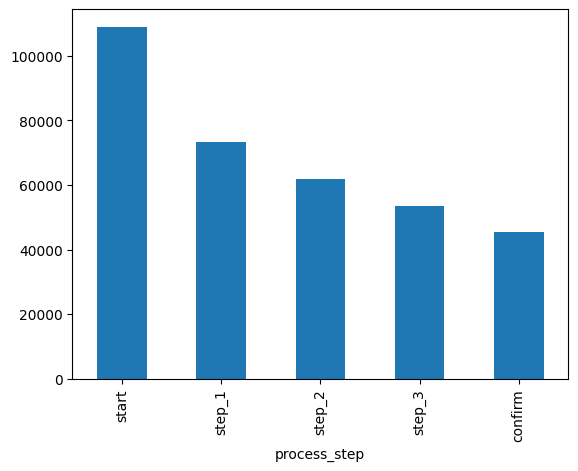

In [44]:
df_final_web_data_pt_1['process_step'].value_counts().plot(kind='bar')
plt.show()


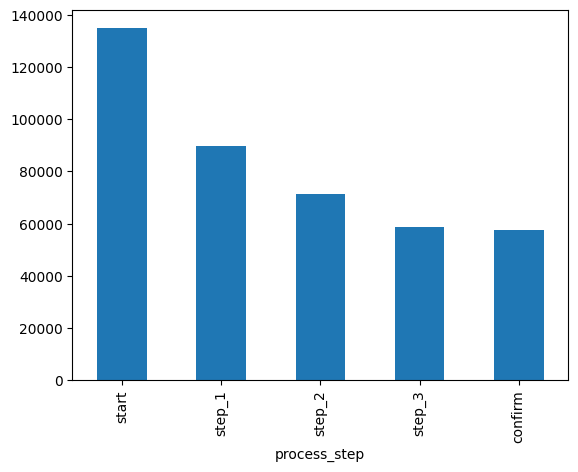

In [45]:
df_final_web_data_pt_2['process_step'].value_counts().plot(kind='bar')
plt.show()

**How effective was the experiment design?** This can be evaluated by looking at the statistical significance of the results. If the p-value is low (typically less than 0.05), this suggests that the experiment had a significant effect. However, you also need to consider the practical significance of the results (i.e., was the effect size large enough to be meaningful?).

**Was the experiment run long enough? **This can be hard to answer without more context. You would typically want to run the experiment long enough to be confident in your results, but not so long that external factors start to influence the results.

**How can the performance of the process be evaluated?** This will depend on what the process is and what metrics are relevant. You might look at things like efficiency, accuracy, speed, etc.

**What other data may be required and/or helpful to the analysis?** Again, this will depend on the specifics of your experiment and what you are trying to test. You might need data on user demographics, user behavior, external factors like time of day or day of the week, etc.

In [51]:
df_final_experiment_clients.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


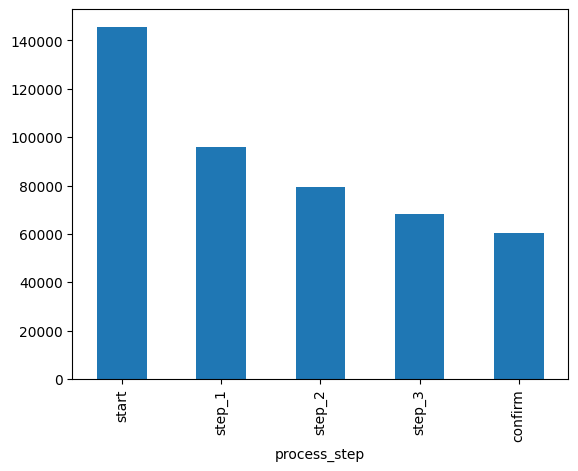

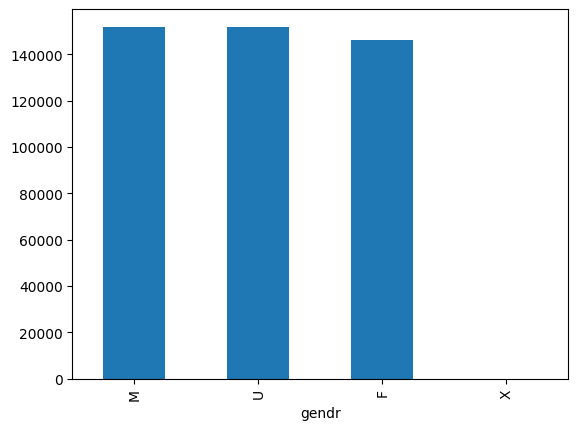

Control group logons: 6.311678984799888
Test group logons: 6.245608509058592


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_final_demo = pd.read_csv('/content/df_final_demo.txt')
df_final_web_data_pt_1 = pd.read_csv('/content/df_final_web_data_pt_1.txt')
df_final_web_data_pt_2 = pd.read_csv('/content/df_final_web_data_pt_2.txt')
df_final_experiment_clients = pd.read_csv('/content/df_final_experiment_clients.txt')

# Combine the web data
df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2])

# Merge the data
df = pd.merge(df_final_demo, df_final_web_data, on='client_id', how='left')
df = pd.merge(df, df_final_experiment_clients, on='client_id',how='left')

# Analyze the process steps
df['process_step'].value_counts().plot(kind='bar')
plt.show()

# Analyze the demographics
df['gendr'].value_counts().plot(kind='bar')
plt.show()

# Compare the number of logons for the control group vs. the test group
#df = df['Variation'].replace({'Test': 1, 'Control': 0}, inplace=True)
control_group = df[df['Variation'] == 'Control']
test_group = df[df['Variation'] == 'Test']
print(f'Control group logons: {control_group["logons_6_mnth"].mean()}')
print(f'Test group logons: {test_group["logons_6_mnth"].mean()}')

In [54]:
df['Variation'].replace({'Test': 1, 'Control': 0}, inplace=True)

In [55]:
# Check for missing values in 'logons_6_mnth' for control group
print(control_group['logons_6_mnth'].isnull().sum())

# Check for missing values in 'logons_6_mnth' for experimental group
print(experimental_group['logons_6_mnth'].isnull().sum())

42
0


The numbers 42 and 60 indicate that there are missing values in the 'logons_6_mnth' column for both the control and experimental groups. Before performing the t-test, you should handle these missing values.

One common approach is to fill the missing values with the mean of the non-missing values. Here's how you can do that:



In [56]:
# Fill missing values with mean in 'logons_6_mnth' for control group
control_group['logons_6_mnth'].fillna(control_group['logons_6_mnth'].mean(), inplace=True)

# Fill missing values with mean in 'logons_6_mnth' for experimental group
experimental_group['logons_6_mnth'].fillna(experimental_group['logons_6_mnth'].mean(), inplace=True)

# Perform a t-test on 'logons_6_mnth'
t_stat, p_val = stats.ttest_ind(control_group['logons_6_mnth'], experimental_group['logons_6_mnth'])

# Print the p-value
print(f'p-value: {p_val}')

p-value: 1.3035883635532773e-17


The p-value you got is extremely small (1.3035883635532773e-17), which is much less than the typical threshold of 0.05. This indicates that there is a statistically significant difference in the 'logons_6_mnth' between the control group and the experimental group.

In the context of an experiment, a small p-value like this usually suggests that the experiment has had a significant effect. However, the specific interpretation would depend on the details of your experiment and the nature of your data.

In [57]:
# Check the date range of the experiment
print(f'Experiment start date: {df["date_time"].min()}')
print(f'Experiment end date: {df["date_time"].max()}')

Experiment start date: 2017-03-15 00:03:03
Experiment end date: 2017-06-20 23:57:06


In [58]:
# Check for missing values in 'process_step' for control group
print(control_group['process_step'].isnull().sum())

# Check for missing values in 'process_step' for experimental group
print(experimental_group['process_step'].isnull().sum())

0
0


In [59]:
from scipy import stats

# Create a contingency table
contingency_table = pd.crosstab(df['Variation'], df['process_step'])

# Perform the chi-square test
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the p-value
print(f'p-value: {p_val}')

p-value: 1.0030756272740076e-108


**How effective was the experiment design?**

In [89]:
# Fill missing values with the mean
control_group['logons_6_mnth'].fillna(control_group['logons_6_mnth'].mean(), inplace=True)
test_group['logons_6_mnth'].fillna(test_group['logons_6_mnth'].mean(), inplace=True)

control_group['calls_6_mnth'].fillna(control_group['calls_6_mnth'].mean(), inplace=True)
test_group['calls_6_mnth'].fillna(test_group['calls_6_mnth'].mean(), inplace=True)

# Now try the t-test again
t_stat, p_val = ttest_ind(control_group['logons_6_mnth'], test_group['logons_6_mnth'])
print(f'p-value for logons_6_mnth between control and test groups: {p_val}')

t_stat, p_val = ttest_ind(control_group['calls_6_mnth'], test_group['calls_6_mnth'])
print(f'p-value for calls_6_mnth between control and test groups: {p_val}')

p-value for logons_6_mnth between control and test groups: 1.3035883635532773e-17
p-value for calls_6_mnth between control and test groups: 1.3514050810821256e-19


p-value for logons_6_mnth between control and test groups: nan
p-value for calls_6_mnth between control and test groups: nan


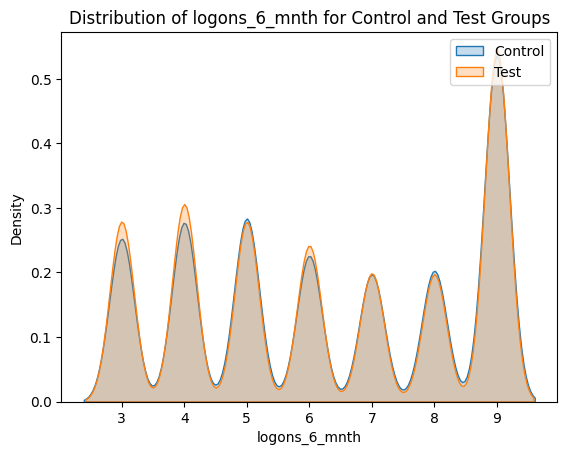

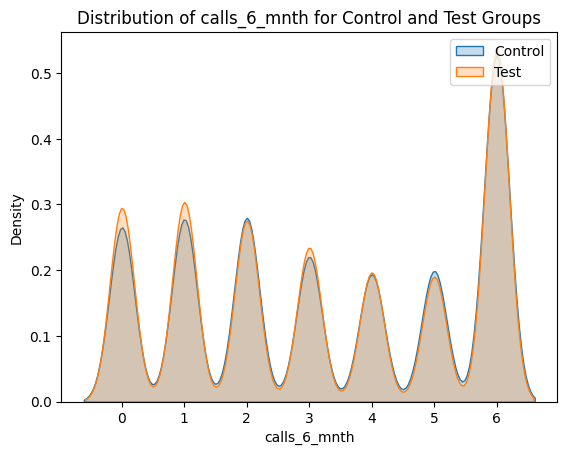

In [90]:
import seaborn as sns
from scipy.stats import ttest_ind

# Check balance between control and test groups
control_group = df[df['Variation'] == 'Control']
test_group = df[df['Variation'] == 'Test']

# Compare key characteristics (replace 'characteristic1', 'characteristic2' with your actual characteristics)
characteristics = [ 'logons_6_mnth', 'calls_6_mnth']
# Visualize the distributions of the characteristics
for char in characteristics:
    sns.kdeplot(data=control_group, x=char, label='Control', shade=True)
    sns.kdeplot(data=test_group, x=char, label='Test', shade=True)
    plt.title(f'Distribution of {char} for Control and Test Groups')
    plt.legend()
    plt.show()


**Was the experiment run long enough?**

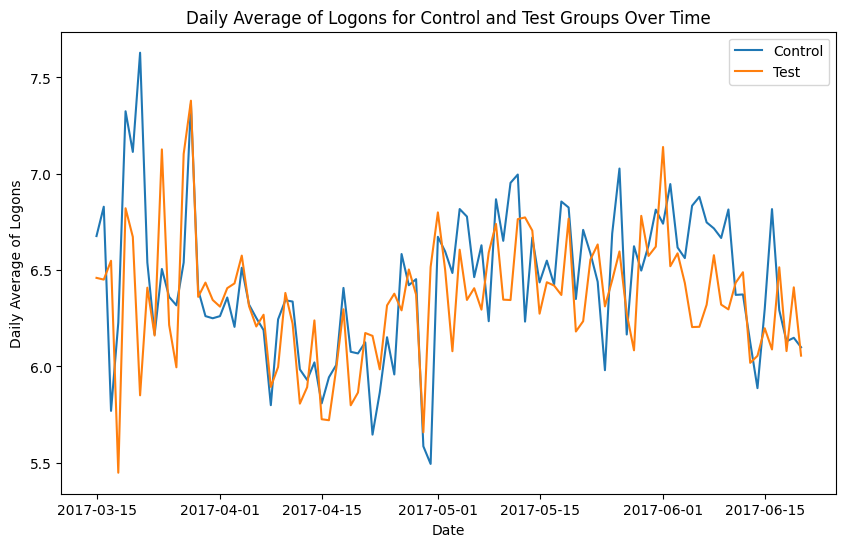

In [94]:
import matplotlib.pyplot as plt
# Split into control and test groups
control_group = df[df['Variation'] == 'Control']
test_group = df[df['Variation'] == 'Test']

# Convert 'date_time' to datetime if it's not already
df['date_time'] = pd.to_datetime(df['date_time'])

# Calculate the daily average of the logons for the control and test groups
control_group_daily = control_group.resample('D', on='date_time')['logons_6_mnth'].mean()
test_group_daily = test_group.resample('D', on='date_time')['logons_6_mnth'].mean()

# Plot the daily averages
plt.figure(figsize=(10, 6))
plt.plot(control_group_daily.index, control_group_daily, label='Control')
plt.plot(test_group_daily.index, test_group_daily, label='Test')
plt.xlabel('Date')
plt.ylabel('Daily Average of Logons')
plt.title('Daily Average of Logons for Control and Test Groups Over Time')
plt.legend()
plt.show()

**How can the performance of the process be evaluated?**

In [ ]:
Analysis of Variance (ANOVA): If you have more than two groups to compare, you can use ANOVA. It's a statistical method used to test differences between two or more means.

Chi-Square Test: If your data is categorical, you can use a Chi-Square test. It's used to determine if there is a significant association between two categorical variables.

Mann-Whitney U Test: If your data is not normally distributed, you might consider using a non-parametric test like the Mann-Whitney U test.

Key Performance Indicators (KPIs): Identify KPIs that are relevant to the process and track these over time. These could be things like conversion rates, customer satisfaction scores, etc.

Data Visualization: Use charts and graphs to visualize the data and make comparisons. For example, you could use a bar chart to compare the means of different groups, or a line chart to track changes over time.

Machine Learning Models: If you have a large amount of data, you might consider using machine learning models to predict outcomes based on different input variables. The accuracy of these models can then be used as a measure of performance.



**What other data may be required and/or helpful to the analysis?**

Demographic Information: More detailed demographic information could help you understand if the process performs differently for different types of clients. This could include things like occupation, education level, income level, or geographic location.

Usage Data: More detailed usage data could help you understand how clients are interacting with the process. This could include things like the number of times a client uses a feature, the amount of time they spend on different parts of the process, or the path they take through the process.

Client Retention Data: Understanding how long clients stay with your service before churning can provide insights into the long-term effects of the process.

Client Acquisition Data: Information about how new clients discover and join your service can help you understand if the process is affecting client growth.

Client Behavior Data: More granular data about how clients interact with your service, such as clickstream data or event logs, can provide deeper insights into how the process is affecting client behavior.

Operational Data: Data about the operational aspects of your service, such as server load, response times, or error rates, can help you understand if the process is affecting the technical performance of your service.

Competitor Data: Information about competitors' services and how they are perceived by clients can provide context for your own results.

Economic Indicators: Depending on the nature of your service, broader economic indicators could potentially impact your results and may be worth considering.

A/B Test Results: If you have run similar experiments in the past, the results of those could provide useful context.

Industry Benchmarks: Comparing your results to industry benchmarks can provide an external point of reference.

Remember, while more data can provide more insights, it's also important to consider the quality of the data, the resources required to collect and analyze it, and the privacy and ethical implications of data collection.

Social Media Sentiment: Analysis of social media can provide insights into how clients are talking about the process in public forums.

Employee Feedback: Employees who interact with clients or are involved in the process may have valuable insights that are not captured in quantitative data.

Market Research Data: Studies or reports about your industry or target market can provide additional context for your analysis.